# <p style="text-align: center;"> <b>Question 2</b></p>
---

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #867FEE; font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents ✍️</b></h3>

- [1. Question](#1)
    - [1.1 The purpose of the question](#1.1)
    - [1.2 How to solve the question](#1.2)
- [2. Finding the answer](#2)
    - [Question 2.1: Should artists pick genres they like or go for what's popular?](#2.1)
    - [Question 2.2: Is it better for artists to stick to a few genres or expand their genre range?](#2.2)
- [3. Answer the question](#3)


<a class="anchor" id="1"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">1. Question  </div>

**How should artists choose their music genres?**

<a class="anchor" id="1.1"></a>
## <span style='color:#2B9C15 '> 1.1 The purpose of the question 👁️‍🗨️ </span>

- In guiding artists in their musical genre selection, this question aims to provide insights that will assist them in shaping their artistic identity. By addressing this question, artists can make informed decisions about whether to pursue genres aligned with their personal style, focus on their strengths, explore a diverse range of genres, or venture into currently popular and trending music styles.


<a class="anchor" id="1.2"></a>
## <span style='color:#2B9C15 '> 1.2 How to solve the question 📊 </span>

&#x1F4A1; To answer this, we'll break it down into two questions:

1. **Choosing Personal vs. Trending Genres**:
    
    - Should artists pick genres they like or go for what's popular?

2. **Focus vs. Diversification**:

    - Is it better for artists to stick to a few genres or expand their genre range?




<a class="anchor" id="2"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">2. Finding the answer  </div>

### <span style='color:#2B9C15 '> 📕 Import Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

### <span style='color:#2B9C15 '> 📕 Load data</span>

In [2]:
df = pd.read_csv('data/cleaned_dataset.csv')
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic



<a class="anchor" id="2.1"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">Question 2.1: Should artists pick genres they like or go for what's popular? </div>

&#x1F4A1; To address this question, we will analyze the most popular artists in the dataset. We'll examine the genres they express in their songs, compare them with the currently most favored genres, and provide insights and conclusions based on these comparisons. 

&#x1F4D9; The goal is to identify patterns in the musical choices of top artists and assess how their genre preferences align with or differ from the current popular trends.

&#x1F50D; We'll start by performing some preprocessing steps to prepare the data for analysis. We need to extract:

-  **Top genres**: The most popular genres in the dataset by mean popularity of its songs
-  **Top artists**: The most popular artists in the dataset by mean popularity of their songs
-  **Genres of top artists**: The genres expressed in the songs of the top artists


### <span style='color:#2B9C15 '> 📕 Top genres</span>

Popularity of genres is determined by the mean popularity of songs in each genre. We'll use the `groupby` function to group the data by genre and calculate the mean popularity of songs in each genre.

In [3]:
top_genres = df.groupby('track_genre')['popularity'].mean()
top_genres = top_genres[top_genres >= 35].sort_values(ascending=False)
top_genres[:10]

track_genre
pop-film     59.280280
k-pop        56.963928
chill        53.704705
sad          52.379000
grunge       49.582583
indian       49.528529
anime        48.766767
emo          48.128000
pop          47.903323
sertanejo    47.866000
Name: popularity, dtype: float64


### <span style='color:#2B9C15 '> 📕 Top artists</span>

- Column `artists` contains a list of artists for each song separated by a semicolon. To extract the artists, we follow these steps:

    - Split the artists in each row into a list of artists using the `split` function
    - Use the `explode` function to create a new row for each artist in the list

In [4]:
copy_df = df.copy()
copy_df['artists'] = copy_df['artists'].str.split(';')
copy_df = copy_df.explode('artists')

- We now can group the data by artist and calculate the mean popularity of songs by each artist to determine the top artists.

In [5]:
top_artists = copy_df.groupby('artists')['popularity'].mean()
top_artists = top_artists[top_artists >= 70].sort_values(ascending=False)
top_artists[:10]

artists
Bizarrap            99.0
Quevedo             99.0
Harry Styles        92.0
Luar La L           90.5
Beach Weather       90.0
Pablo Pesadilla     88.0
Polimá Westcoast    88.0
Olivia Rodrigo      87.4
Lewis Capaldi       87.0
Yung Gravy          87.0
Name: popularity, dtype: float64


### <span style='color:#2B9C15 '> 📕 Genres of top artists</span>

- With the top artists identified, we use the `isin` function to filter the data to only include songs by the top artists.
- We then use `unique` to extract the unique genres expressed in the songs of the top artists.

In [6]:
top_artists = top_artists.index.tolist()
genres_artists = df[df['artists'].isin(top_artists)]['track_genre'].unique().tolist()
genres_artists[:10]

['alt-rock',
 'alternative',
 'blues',
 'british',
 'cantopop',
 'chill',
 'country',
 'dance',
 'disco',
 'edm']

### 💎**Analysis**

After extracting the top genres, top artists, and genres of top artists, we can now analyze the data to answer the question.

- **Top genres vs. genres of top artists**

    We use venn diagrams to compare the top genres with the genres of top artists. The venn diagrams show the genres that are common and unique to each group.

- **Popularities of each set of genres**: We use bar charts to compare the mean popularity of songs in three set of genres:
    - Top popular genres (not expressed by top artists)
    - Top popular genres (expressed by top artists)
    - Genres expressed by top artists and in top popular genres


🖥️ We use `matplotlib_venn` to plot the venn diagrams so we need to install it first (if not already installed).


In [7]:
!pip install matplotlib_venn


### <span style='color:#2B9C15 '> 📕 Top genres vs. genres of top artists</span>


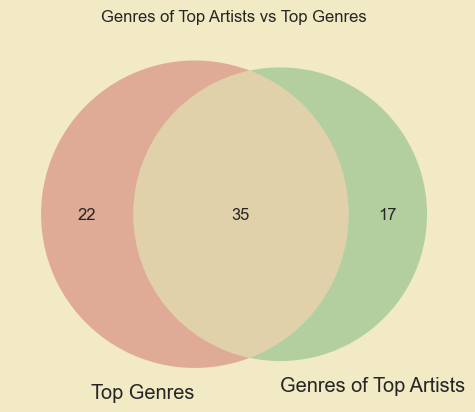

In [8]:
from matplotlib_venn import venn2
top_genres = top_genres.index.tolist()
venn2([set(top_genres), set(genres_artists)], set_labels=('Top Genres', 'Genres of Top Artists'))
plt.title('Genres of Top Artists vs Top Genres')
plt.show()


### &#x1F4C8; Comment

- 🎶 There's a noticeable overlap between popular music genres and those embraced by renowned artists. Out of 57 popular genres, **35** stand out not just as crowd favorites but also as the chosen realms of passion for celebrated artists. Moreover, these artists venture into 17 different genres, showcasing not only their alignment with trends but also their independence and creativity in discovering unique musical genres with a distinctive personal touch.

- 🎸 The fusion of popular music genres and the individual preferences of famous artists vividly illustrates the increasingly diverse and rich trends in the world of music. Artists fearlessly break boundaries, experimenting with new genres to craft unique musical masterpieces, each bearing their personal signature.

- 🌐 This not only enriches the musical landscape but also provides listeners with a diverse range of choices, from mainstream hits to distinctive creations. It fuels development and innovation within the music industry.



### <span style='color:#2B9C15 '> 📕 Popularities of each set of genres</span>


📊 We will create a bar chart to visualize the popularity of genres falling into three sets:

- Exclusively belonging to the top genres.
- Exclusively belonging to genres of top artists.
- Belonging to both the top genres and genres of top artists.

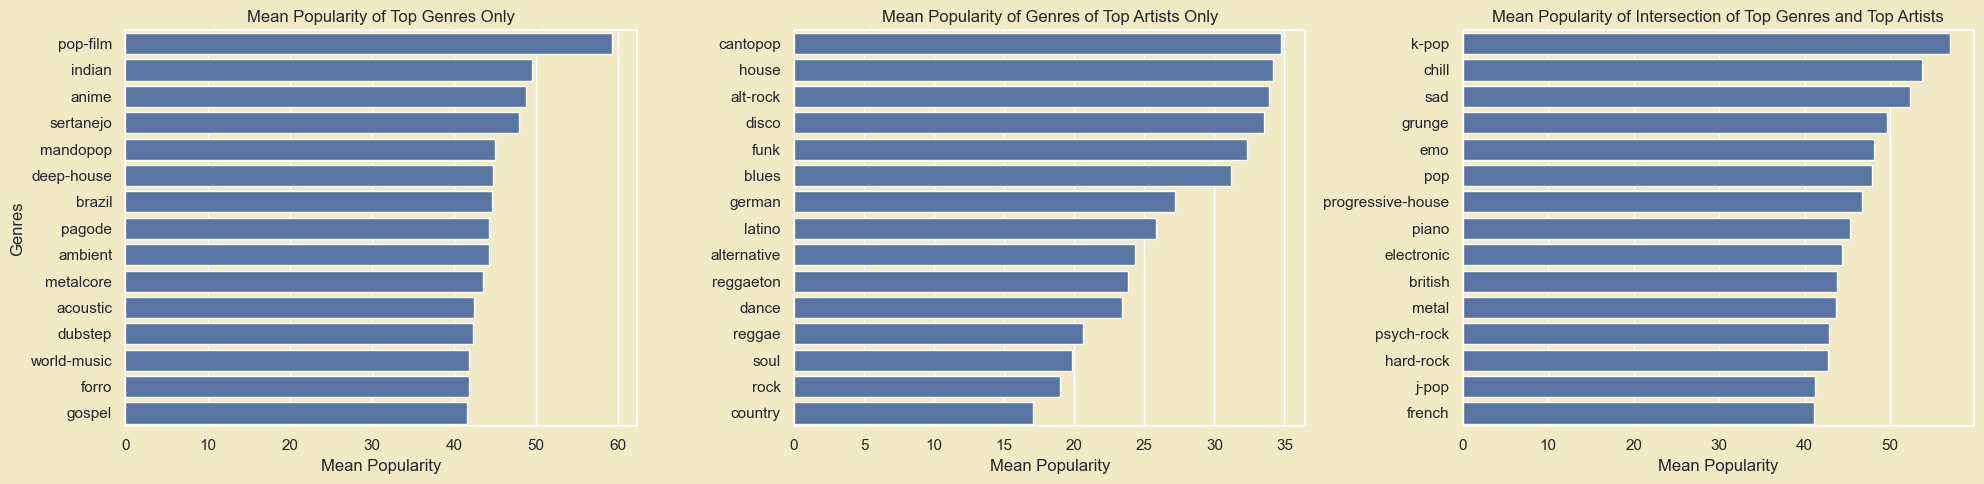

In [9]:
top_genres_only = list(set(top_genres) - set(genres_artists))
genres_artists_only = list(set(genres_artists) - set(top_genres))
intersection = list(set(top_genres) & set(genres_artists))

top_genres_only = df[df['track_genre'].isin(top_genres_only)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)
genres_artists_only = df[df['track_genre'].isin(genres_artists_only)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)
intersection = df[df['track_genre'].isin(intersection)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(x=top_genres_only.values, y=top_genres_only.index, ax=axes[0])
axes[0].set_title('Mean Popularity of Top Genres Only')
axes[0].set_xlabel('Mean Popularity')
axes[0].set_ylabel('Genres')

sns.barplot(x=genres_artists_only.values, y=genres_artists_only.index, ax=axes[1])
axes[1].set_title('Mean Popularity of Genres of Top Artists Only')
axes[1].set_xlabel('Mean Popularity')
axes[1].set_ylabel('')

sns.barplot(x=intersection.values, y=intersection.index, ax=axes[2])
axes[2].set_title('Mean Popularity of Intersection of Top Genres and Top Artists')
axes[2].set_xlabel('Mean Popularity')
axes[2].set_ylabel('')


plt.tight_layout()
plt.show()


### &#x1F4C8; Comment

- The most popular music genres such as *pop-film*, *sad*, *Indian*, *anime*, etc., all exhibit an average popularity exceeding 40. This signifies strong favoritism from listeners towards these genres.

- Genres associated with the preferences of famous artists although popular, tend to have lower popularity compared to top genres. This can be explained by the fact that these genres are not as widely known as the top genres, and thus, have a smaller audience.

- Music genres that fall into both top genres and the preferences of famous artists, like *k-pop*, *chill*, *pop*, etc., often boast an average popularity exceeding 40. This can be explained by the broad appeal these genres have for audiences, and renowned artists frequently choose these genres to showcase their compositional talents.



<a class="anchor" id="2.2"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">Question 2.2: Is it better for artists to stick to a few genres or expand their genre range? </div>


&#x1F4A1;  To address this question, we'll analyze the popularity of artists with varying genre ranges. By comparing the popularity of artists with a narrow range of genres to those with a broad range of genres, we aim to offer insights and conclusions based on these comparisons.

&#x2753; But how many genres is considered narrow or broad? 

To answer this, we'll first need to determine the range of genres for all artists and top artists. We'll then use the range of genres for top artists as a benchmark to classify artists into two groups:

- **Narrow range**: Artists with a genre range less than to the range of genres for top artists.
- **Broad range**: Artists with a genre range greater than or equal to the range of genres for top artists.


### <span style='color:#2B9C15 '> 📕 Distribution of number of genres</span>

- We will use `groupby` to group the data by artist and count the number of genres for all artists and top artists.

In [10]:

copy_df = df.copy()
copy_df['artists'] = copy_df['artists'].str.split(';')
copy_df = copy_df.explode('artists')

artist_genre_count = copy_df.groupby('artists')['track_genre'].nunique().sort_values(ascending=False)

top_artists = copy_df.groupby('artists')['popularity'].mean()
top_artists = top_artists[top_artists >= 60].sort_values(ascending=False)
top_artists = top_artists.index.tolist()

copy_df = copy_df[copy_df['artists'].isin(top_artists)]

top_artist_genre_count = copy_df.groupby('artists')['track_genre'].nunique().sort_values(ascending=False)

- And then we will create 2 histograms to visualize the distribution of the number of genres for all artists and top artists.

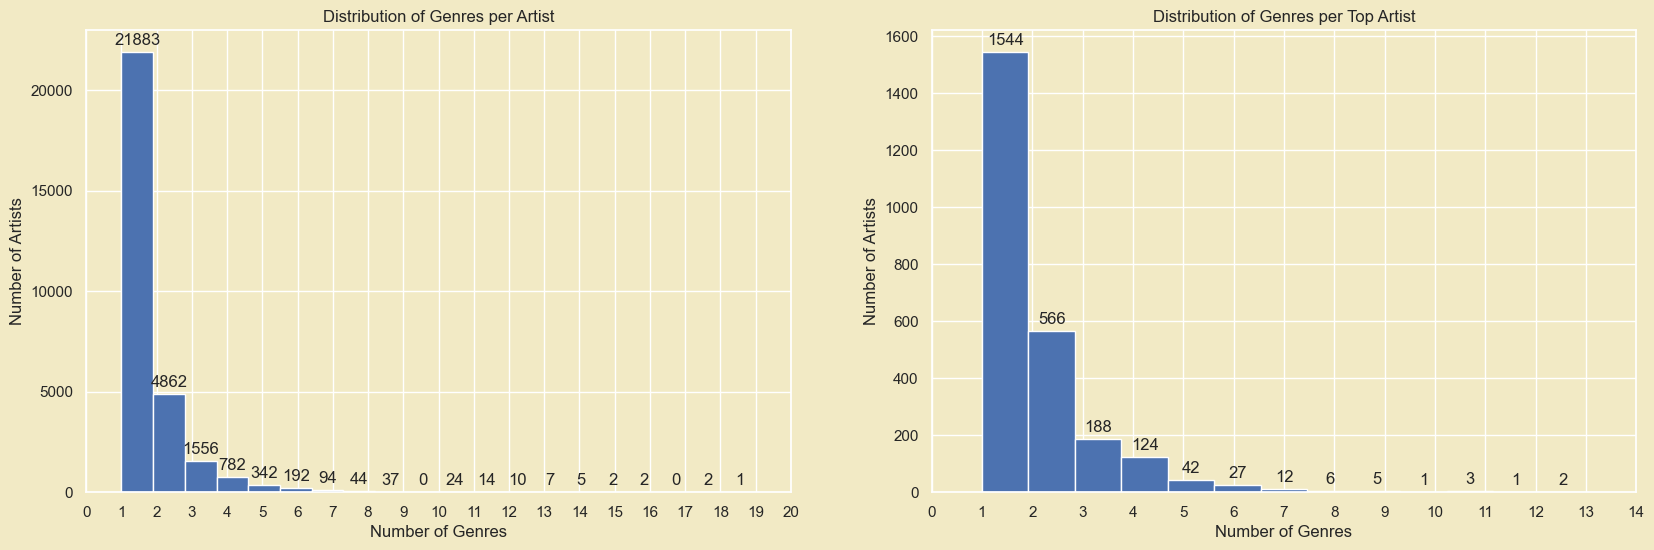

In [11]:
# Plot distribution of genres per artist and top artists
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.set_style('darkgrid')
axes[0].hist(artist_genre_count, bins=20)
axes[0].set_title('Distribution of Genres per Artist')
axes[0].set_xlabel('Number of Genres')
axes[0].set_ylabel('Number of Artists')
axes[0].bar_label(axes[0].containers[0], padding=3)
axes[0].set_xticks(np.arange(0, 21, 1))

axes[1].hist(top_artist_genre_count, bins=13)
axes[1].set_title('Distribution of Genres per Top Artist')
axes[1].set_xlabel('Number of Genres')
axes[1].set_ylabel('Number of Artists')
axes[1].bar_label(axes[1].containers[0], padding=3)
axes[1].set_xticks(np.arange(0, 15, 1))

plt.show()

### &#x1F4C8; Comment

In the entire dataset:
- The majority of artists cover 1-3 music genres.
- Some artists exhibit more diversity, ranging from 4 to 9 music genres.
- Very few artists delve into 10 or more genres, with a maximum of 19 genres.

For top artists:
- Most artists also cover 1-3 music genres, aligning closely with the overall dataset.
- Some artists showcase greater diversity, covering 4-7 music genres, albeit fewer than the entire dataset.
- Very few artists explore 8 or more genres, with a maximum of 13 genres.

😊 Therefore, we can consider artists with **4** or more genres as those with a diverse range.



### <span style='color:#2B9C15 '> 📕 Analysis</span>

- Now, we can calculate the popularity of artists with a narrow range of genres and those with a broad range of genres.
    - We use `isin` to filter the data to the two groups of artists.
    - We then use `groupby` to group the data by artist and calculate the mean popularity of songs by each artist.

In [12]:
artist_more_than_4_genres = artist_genre_count[artist_genre_count >= 4].index.tolist()
df_more_than_4_genres = copy_df[copy_df['artists'].isin(artist_more_than_4_genres)]

diverse_artists = df_more_than_4_genres.groupby('artists')['popularity'].mean()

artist_less_than_4_genres = artist_genre_count[artist_genre_count < 4].index.tolist()
df_less_than_4_genres = copy_df[copy_df['artists'].isin(artist_less_than_4_genres)]

less_diverse_artists = df_less_than_4_genres.groupby('artists')['popularity'].mean()

- Create 4 charts to visualize the popularity of artists with a narrow range of genres and those with a broad range of genres.
    - 2 histograms to visualize the distribution of popularity scores for artists with a narrow range of genres and those with a broad range of genres.
    - 2 bar charts to visualize the mean popularity scores of top artists with a narrow range of genres and those with a broad range of genres.

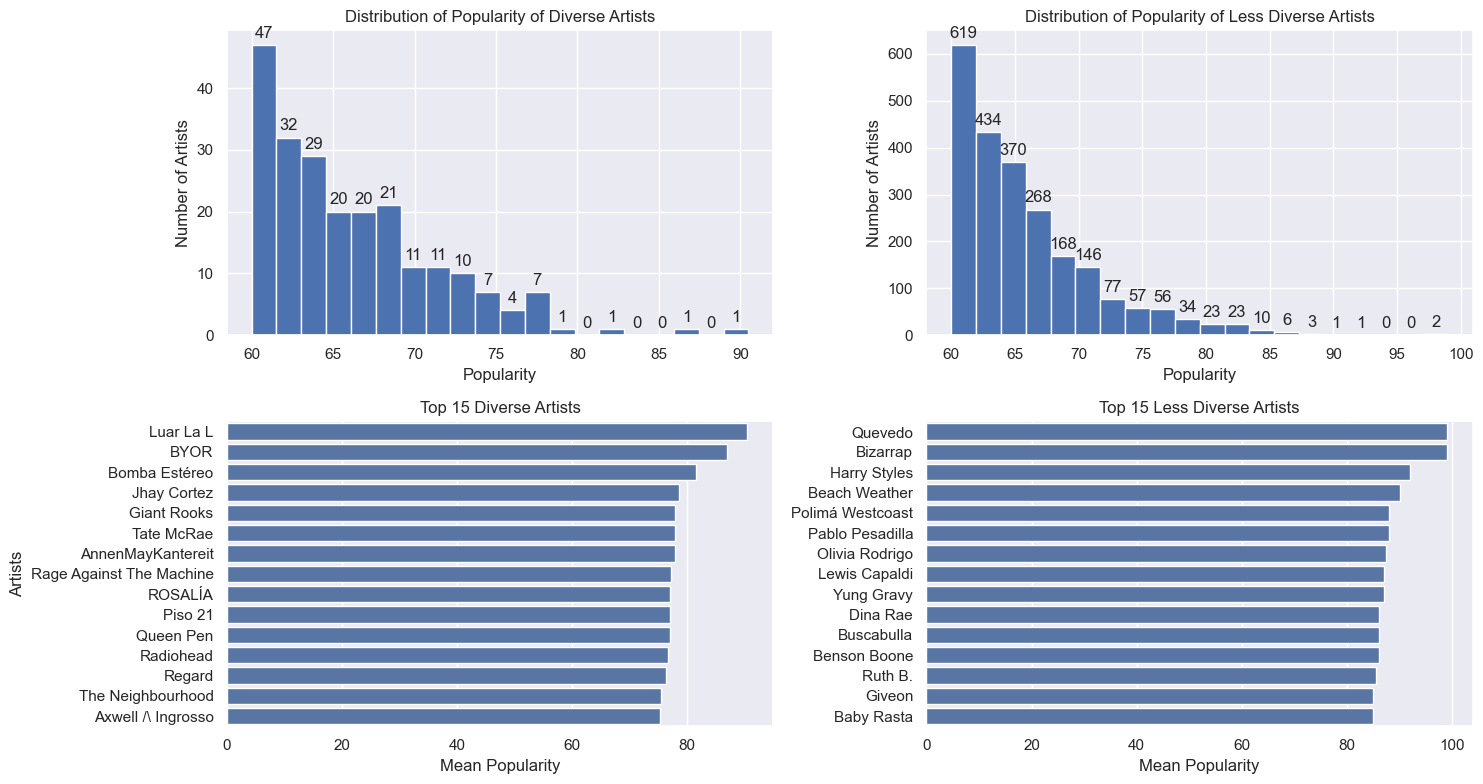

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
axes[0, 0].hist(diverse_artists, bins=20)
axes[0, 0].set_title('Distribution of Popularity of Diverse Artists')
axes[0, 0].set_xlabel('Popularity')
axes[0, 0].set_ylabel('Number of Artists')
axes[0, 0].bar_label(axes[0, 0].containers[0], padding=3)

axes[0, 1].hist(less_diverse_artists, bins=20)
axes[0, 1].set_title('Distribution of Popularity of Less Diverse Artists')
axes[0, 1].set_xlabel('Popularity')
axes[0, 1].set_ylabel('Number of Artists')
axes[0, 1].bar_label(axes[0, 1].containers[0], padding=3)

sns.barplot(x=diverse_artists.sort_values(ascending=False).head(15).values, y=diverse_artists.sort_values(ascending=False).head(15).index, ax=axes[1, 0])
axes[1, 0].set_title('Top 15 Diverse Artists')
axes[1, 0].set_xlabel('Mean Popularity')
axes[1, 0].set_ylabel('Artists')

sns.barplot(x=less_diverse_artists.sort_values(ascending=False).head(15).values, y=less_diverse_artists.sort_values(ascending=False).head(15).index, ax=axes[1, 1])
axes[1, 1].set_title('Top 15 Less Diverse Artists')
axes[1, 1].set_xlabel('Mean Popularity')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()


### &#x1F4C8; Comment

- The popularity distribution among diverse and less diverse artists appears remarkably similar, indicating that the number of genres an artist explores does not significantly impact their popularity.

- Notably, both diverse and less diverse artist groups include renowned names like *Harry Styles*, *Olivia Rodrigo*, and *Eminem*, suggesting that fame is not strongly tied to the diversity of genres an artist engages in.

- The correlation in popularity distribution between the two artist groups suggests that pursuing a broader range of music genres does not diminish an artist's popularity compared to those sticking to a single genre. This could be attributed to the diverse and open-minded nature of contemporary audiences towards various music genres.

- The example of Taylor Swift, known for her sweet ballads but also venturing into pop rock, country, R&B, illustrates that diversifying genres can attract fans across different music tastes.

- Conversely, artists focusing on a single genre can still achieve significant popularity if they excel in that specific genre.




<a class="anchor" id="3"></a>
## <div style="text-align: left; background-color:#867FEE; font-family:newtimeroman;color: black; padding: 14px; line-height: 1;border-radius:10px">3. Answer the question </div>

**Question**: How should artists choose their music genres?

**Answer**: 

Choosing a music genre is a crucial decision for any artist, influencing both their career trajectory and the development of personal style. There are many factors to consider when selecting a music genre, including:

- **Personal Hobbies and Passions🎸:**
   - The artist's foremost consideration should be their personal hobbies and passions. Pursuing a genre they genuinely love provides the motivation needed to create high-quality music that resonates with the audience.

- **Market Trends📈:**
   - Staying attuned to market trends is essential. Understanding the audience's preferences helps artists decide whether to follow a popular genre or seek uniqueness within the market.

- **Assessment of Skills and Talent🎤:**
   - Each music genre has unique requirements in terms of skills and vocal capabilities. Artists need to evaluate their own abilities to choose a genre that aligns with their strengths. If a chosen genre is too challenging, artists may explore other genres to find opportunities for career growth.

In light of the dataset analysis, here are some recommendations for artists:

- If a genre is currently popular, has broad appeal, and aligns with the artist's preferences, they should consider choosing that genre for increased chances of success.

- If the artist's preferred genre is less popular, they can still pursue it if they have a genuine passion for it. Many successful artists have built substantial fan bases by staying true to their unique style. Additionally, exploring other genres might open up new avenues for career development.

- The number of genres an artist chooses does not significantly impact their popularity. Taylor Swift, for example, is known for her sweet ballads but has successfully ventured into pop rock, country, and R&B, attracting a diverse fanbase.

- Artists should avoid frequent genre changes, as this may make it challenging for fans to follow and support them. It's also advisable not to force oneself into a genre they don't enjoy, as it may hinder the creation of high-quality music.

**Conclusion:**
Choosing a music genre is a personal and creative journey where artists combine passion with strategy. This decision not only shapes their career but also contributes to the diversity and richness of today's music industry. Artists should carefully weigh the factors mentioned above to make a choice that aligns best with their unique identity.

